In [21]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [22]:
all_df = pd.read_csv("data/bank.csv")

In [23]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
df=all_df[cols]

In [24]:
df['deposit']= df['deposit'].map({'no':0, 'yes': 1}).astype(int) 

/home/bruce/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
X=df.drop(['deposit'], axis=1).values

In [26]:
Y = df['deposit'].values.astype('int64')

In [27]:
X.shape

(11162, 7)

In [28]:
X[:5]

array([[  59, 2343,    5, 1042,    1,   -1,    0],
       [  56,   45,    5, 1467,    1,   -1,    0],
       [  41, 1270,    5, 1389,    1,   -1,    0],
       [  55, 2476,    5,  579,    1,   -1,    0],
       [  54,  184,    5,  673,    2,   -1,    0]])

In [29]:
Y[:5]

array([1, 1, 1, 1, 1])

In [30]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

/home/bruce/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/bruce/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


8929

In [31]:
train_Features[355:359]

array([[-0.6070719 , -0.47392593, -0.67194688, -0.79223178, -0.55416834,
         0.30959575,  0.0730585 ],
       [-0.27129961, -0.2937859 , -1.14698582, -0.84408811, -0.55416834,
        -0.48118405, -0.36325984],
       [-0.94284418, -0.05969689,  0.278131  , -1.03422801,  0.18059759,
         2.79227652,  1.81833188],
       [ 0.98784645, -0.47268572,  1.70324782, -0.32552475,  0.18059759,
        -0.48118405, -0.36325984]])

In [32]:
train_Label[:4]

array([0, 1, 0, 1])

In [33]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(units=7*2,   input_dim=7,
                kernel_initializer='uniform', 
                activation='relu'))

In [36]:
model.add(Dense(units=7,   
                kernel_initializer='uniform', 
                activation='relu'))

In [37]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 8         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [40]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=60, 
                         batch_size=200,verbose=1,callbacks=[early_stopping])

Train on 8036 samples, validate on 893 samples
Epoch 1/60
8036/8036 [==============================] - 1s 169us/step - loss: 0.6920 - acc: 0.5261 - val_loss: 0.6887 - val_acc: 0.5622
Epoch 2/60
8036/8036 [==============================] - 0s 31us/step - loss: 0.6803 - acc: 0.6644 - val_loss: 0.6636 - val_acc: 0.7335
Epoch 3/60
8036/8036 [==============================] - 0s 39us/step - loss: 0.6386 - acc: 0.7413 - val_loss: 0.6077 - val_acc: 0.7492
Epoch 4/60
8036/8036 [==============================] - 0s 38us/step - loss: 0.5792 - acc: 0.7498 - val_loss: 0.5527 - val_acc: 0.7548
Epoch 5/60
8036/8036 [==============================] - 0s 33us/step - loss: 0.5393 - acc: 0.7541 - val_loss: 0.5237 - val_acc: 0.7716
Epoch 6/60
8036/8036 [==============================] - 0s 35us/step - loss: 0.5202 - acc: 0.7575 - val_loss: 0.5091 - val_acc: 0.7693
Epoch 7/60
8036/8036 [==============================] - 0s 43us/step - loss: 0.5119 - acc: 0.7582 - val_loss: 0.5038 - val_acc: 0.7704
Epoch 8

In [41]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

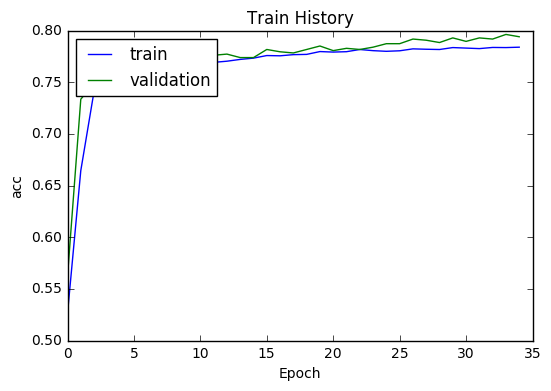

In [42]:
show_train_history(train_history,'acc','val_acc')

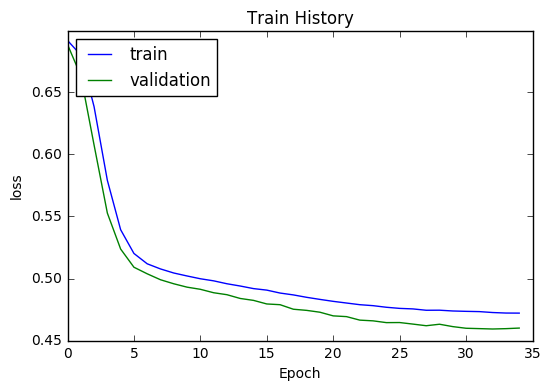

In [43]:
show_train_history(train_history,'loss','val_loss')

In [44]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 0s 76us/step


In [45]:
scores[1]

0.7828034038133702